# Handout 03
#### Sara Díaz del Ser

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Ex. 1 _(0 pts)_ Matrices as lists of lists

The previously mentioned solution for initializing matrices as lists of lists works fine. Now,
consider the following modification, which tries to optimize setting up the matrix by initial-
izing a single row of n 0’s only once and append this row m times:
```
    row = [0]*n # WRONG
    mat=[]
    for i in range(m):
    mat.append(row)
```
or even shorter:
```
    mat=[[0]*n]*m # WRONG
```
Why are these alternatives wrong? Demonstrate this using an example.

In [2]:
# The correct way is:

def matrix(m:int=5,n:int=5) ->list:
    """Initializes a mxn matrix"""
    mat=[]
    for i in range(m):
        row = [0]*n
        mat.append(row)
    return mat

def matrix_short(m:int=5,n:int=5) ->list:
    return [[0]*n for _ in range(m)]

In [3]:
matrix = matrix_short()

In this case, if we attempt to reassign the value of an element, it works as expected:

In [4]:
matrix[2][1] = '1'
matrix

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, '1', 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [5]:
def matrix_wrong(m:int=5,n:int=5) ->list:
    """Initializes a mxn matrix"""
    row=[0]*n
    mat=[]
    for i in range(m):
        mat.append(row)
    return mat

def matrix_short_wrong(m:int=5,n:int=5) ->list:
    return [[0]*n]*m

In [6]:
matrix = matrix_short_wrong()

Here, however, each row is a copy of eachother, so when we attempt to reassign a value, it does so in every row:

In [7]:
matrix[1][2] = '1'
matrix

[[0, 0, '1', 0, 0],
 [0, 0, '1', 0, 0],
 [0, 0, '1', 0, 0],
 [0, 0, '1', 0, 0],
 [0, 0, '1', 0, 0]]

### Ex. 2 _(20 pts)_ The Dotplot Matrix

#### (a) _(4 pts)_ Generate dotplot matrix

Write a function dotplot(seqA,seqB,w,s) that takes four parameters: two DNA or amino-acid sequences and two parameters w and s for the window size and stringency.

The function should return a matrix where the number of rows (1st dimension) corre sponds to the length of seqA and number of columns (2nd dimension) corresponding to the length of seqB. The matrix elements corresponding to positons i in seqA and j in seqB should contain 1 if at least s of the pairs of symbols in the windows of size w
around position i and j match. Otherwise, it should contain 0. (Note: In some definitions of dotplots it is required that symbols at position i and j must always match regrardless of window size and stringency. Feel free to add this additional conditon to your implementation.)

* You can use the numpy package. E.g., ```dp=zeros((len(seqA),len(seqB)),dtype=int)``` creates a new two-dimensional array of the desired dimensions. Elements are accessed using double indices: e.g. dp[1,2] or double indexing dp[1][2].

In [8]:
# (4 pts) Generate dotplot matrix
def dotplot(seqA:str,seqB:str,w:int,s:int) -> np.ndarray:
    """Returns a dotplot matrix of matches between two input sequences"""
    dp = np.zeros((len(seqA), len(seqB)),dtype=int)
    k = int((w-1)/2)
    
    # Add spaces too the begining of both sentences to slice strings
    seqA = seqA.rjust(len(seqA)+k, ' ')
    seqB = seqB.rjust(len(seqB)+k, ' ')
    
    # Parse through both sequences
    for i in range(len(seqA)):
        for j in range(len(seqB)):
            
            if seqA[i] == seqB[j] and seqA[i] != ' ':
                # Check if window has s matches
                score = 0
                for x, y in zip(seqA[i-k:i+k], seqB[j-k:j+k]):
                    if x == y:
                        score+=1
                if score >= s:
                    # Assign 1 to spot
                    dp[i-k,j-k] = 1

    return dp

In [9]:
seqB="peter piper picked a peck of pickled peppers"
seqA="a peck of pickled peppers peter piper picked"
dp = dotplot(seqA,seqB,5,4)
dp

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### (b) _(4 pts)_ The Dotplot as ASCII art

Write a function dotplot2Ascii(dp,seqA,seqB,heading,filename) that takes five parameters: A dotplot matrix dp, the two sequences from which it was generated; heading is a string to be used as title and filename is the name of an output file for the dotplot. The function should create an ASCII dotplot like the one given at the beginning of the handout. You should be able to use the function in the following way:

````
seqA="peter piper picked a peck of pickled peppers"
seqB="a peck of pickled peppers peter piper picked"
dp = dotplot(seqA,seqB,5,4)
dotplot2Ascii(dp,seqA,seqB,"Peter Piper’s first dotplot","mydotplot.txt")
````
Test your program on lines from the file peter.txt. For the above example you can compare your result to peters-dotplot.txt.

In [10]:
def dotplot2Ascii(dp:np.ndarray, seqA:str, seqB:str,heading:str,filename:str):
    """Creates an output file for the doplot"""
    with open (filename, 'w') as file:
        print(heading,"\n", file=file)
        print(f' |{seqA}', file=file)
        print(f'-+{"-"*len(seqA)}', file=file)
        for j in range(len(dp[0])):
            row = "".join([str(each) for each in dp[:,j]]).replace('1','*').replace('0',' ')
            print(f'{seqB[j]}|{row}', file=file)
    return

In [11]:
seqB="peter piper picked a peck of pickled peppers"
seqA="a peck of pickled peppers peter piper picked"
dp = dotplot(seqA,seqB,5,4)
dotplot2Ascii(dp,seqA,seqB,"Peter Piper’s first dotplot","mydotplot.txt")


#### (c) _(4 pts)_ Graphical output using matplotlib

The ASCII output works fine for small sequences. However, for longer sequences a more graphical output would be preferred. For Python, the matplotlib package provides a rich interface for generating graphical outputs. The library is integrated within the python notebook. 

You can use something like 
````
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
````
or even shorter
````%pylab```` 
which corresponds to 
````
from numpy import *
from matplotlib.pylab import *
````
Write a function ````dotplot2Graphics(dp,labelA,labelB,heading,filename)```` that takes a dotplot dp and labels labelA and labelB for identifying the two sequences (e.g., the gene or protein names) as arguments to be used as labels for the y- and x-axis, respectively, and a title for the figure. filename should be the filename for saving the figure.

The function should create a dotplot of the figure, save it to a file and display it on screen. (filename should be a filename with a graphics extension that matplotlib understands like .png, .ps, or .pdf.)

* Write two versions: the first version should plot the dots of the dotplot individ-
ually using an appropriate symbol, e.g. a small + or a small dot. The second
version should use the imshow (or matshow) function of matplotlib, which takes
the complete dp matrix as one argument. (Try to get the colors right.)
* Use headerA and headerB to label the y- and x-axes and heading for the figure
title.
* Ticks at the y- and x-axes should reflect the sequence positions of the respective
sequences. While using the sequence itself as tick markers works for short sequences
it becomes infeasible for the longer sequences of part (e).
* Position (1,1) of the matrix can appear either in the bottom left or top left corner.
Make sure that the origin is in the top left corner, so that sequence A reads from
top to bottom and sequence B from left to right.

In [12]:
def dotplot2Graphics(dp:np.ndarray, labelA:str, labelB:str, heading:str, filename:str,
                     spFlag:bool=False, bigFlag:bool=True):
    """Creates a dotplot, saves it to a file and displays it on screen."""
    # -----------------
    # Type of graph
    # -----------------

    if spFlag:
        # Get X and Y coordinates from dotplot matrix
        x,y = [],[]
        for i in range(len(dp)):
            for j in range(len(dp[0])):
                if dp[i][j] == 1:
                    x.append(i)
                    y.append(j)
        # Create figure with scatter plot
        fig = plt.scatter(x,y, cmap="Blues", marker="+", s=1)

    else:
        # Create figure with imshow
        fig = plt.imshow(dp, cmap='Blues')


    # -----------------
    # Size of graph
    # -----------------
    # if the image is big, remove the letters from the sides of the dp
    
    if bigFlag:
        
        # Hide ticks, show only letters
        fig.axes.tick_params(top=False, bottom=False, left=False, right=False)
        fig.axes.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        # Add labels
        plt.xlabel(labelA)
        plt.ylabel(labelB)


    # if the image is small, add each letter to the corresponding tick
    else:
        # Add letters to ticks
        plt.xticks(np.arange(0,len(labelA),1))
        plt.yticks(np.arange(0,len(labelB),1))
        fig.axes.set_xticklabels(list(labelA))
        fig.axes.set_yticklabels(list(labelB))

        # Hide ticks, show only letters
        fig.axes.tick_params(top=False, bottom=False, left=False, right=False)
        fig.axes.tick_params(labeltop=True, labelbottom=False, labelleft=True, labelright=False)

    plt.axis("tight")  # gets rid of white border
    plt.axis("image")  # square up the image instead of filling the "figure" space


    # Add title
    plt.title(heading,fontweight="bold",pad=10)
    plt.savefig(filename)

    plt.show()
    return

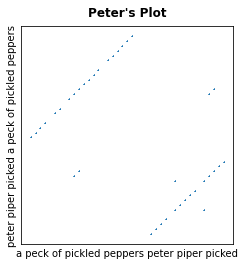

In [13]:
labelB="peter piper picked a peck of pickled peppers"
labelA="a peck of pickled peppers peter piper picked"

dotplot2Graphics(dp,labelA,labelB, heading="Peter's Plot", filename="peters_plot.png", spFlag=True)


#### (d) _(4 pts)_ Write a script

Combine all functions in a single script named dotplot.py the script should take a
number of command line arguments:

````python dotplot.py w s seqA seqB title output````

The command line parameters w and s should give the window and stringency of the
dotplot. seqA and seqB should be the names of two files containing sequences in FASTA
format. title is a heading for the dotplot and output should be a filename to which
the resulting dotplot is written. If the output filename has extension .txt the function
````dotplot2Ascii```` should be used for generating the dotplot and if it has a graphics
extension (.png, .ps, or .pdf) use ````dotplot2Graphics````. You should be able to call your
program from within the notebook using:
````
%run dotplot.py 10 6 human_pax6_NM_001604.fasta mouse_pax6_NM_013627.fasta human-vs-mouse human-mouse.png
````

Reading files: 
	./human_pax6_NM_001604.fasta
	./mouse_pax6_NM_013627.fasta
Generating DotPlot Matrix...


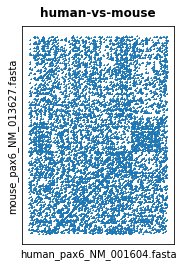

Results saved: human-mouse.png


In [14]:
%run diazdelser_dotplot.py 10 6 "./human_pax6_NM_001604.fasta" "./mouse_pax6_NM_013627.fasta" "human-vs-mouse" "human-mouse.png"

#### (e) _4 pts)_ Generate some nice dotplots

Generate dotplots for the following two pairs of sequences.

```(a) human_pax6_NM_001604.fasta versus mouse_pax6_NM_013627.fasta```

```(b) PAX6_HUMAN_P26367.fasta versus eyeless_NP_001014693.1.fasta ```

Find “good” values for window size and stringency so that significant sequence similarities show up in the dotplot while the noise of random matches is reduced. Note, that one comparison is between DNA sequences while the other pair contains aminoacid sequences. This should be reflected in different choices of width and stringency
accordingly.

Reading files: 
	./human_pax6_NM_001604.fasta
	./mouse_pax6_NM_013627.fasta
Generating DotPlot Matrix...


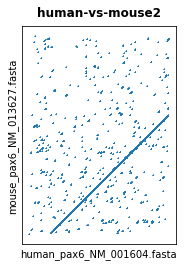

Results saved: human-mouse.png


In [15]:
%run diazdelser_dotplot.py 20 12 "./human_pax6_NM_001604.fasta" "./mouse_pax6_NM_013627.fasta" "human-vs-mouse2" "human-mouse.png"

Reading files: 
	./PAX6_HUMAN_P26367.fasta
	./eyeless_NP_001014693.1.fasta
Generating DotPlot Matrix...


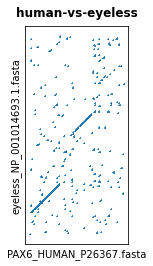

Results saved: human-vs-eyeless.png


In [16]:
%run diazdelser_dotplot.py 5 3 "./PAX6_HUMAN_P26367.fasta" "./eyeless_NP_001014693.1.fasta" "human-vs-eyeless" "human-vs-eyeless.png"

### Ex. 3 _(2 pts)_ The Icosian Game

This is a 19th-century puzzle invented by the renowned Irish mathematician Sir William
Hamilton (1805-1865) and presented to the worls as the “Icosian Game”. The game was
playes on a wooden board with holes representing major world cities and grooves representing
connections between them. The object of the game was to find a circular route that would
pass through all the cities exactly once before returning to the starting point. Nowadays such
a route is known as a Hamiltonian circle. (Taken from: A. Levitin, M. Levitin Algorithmic
Puzzles. Oxford University Press 2011)

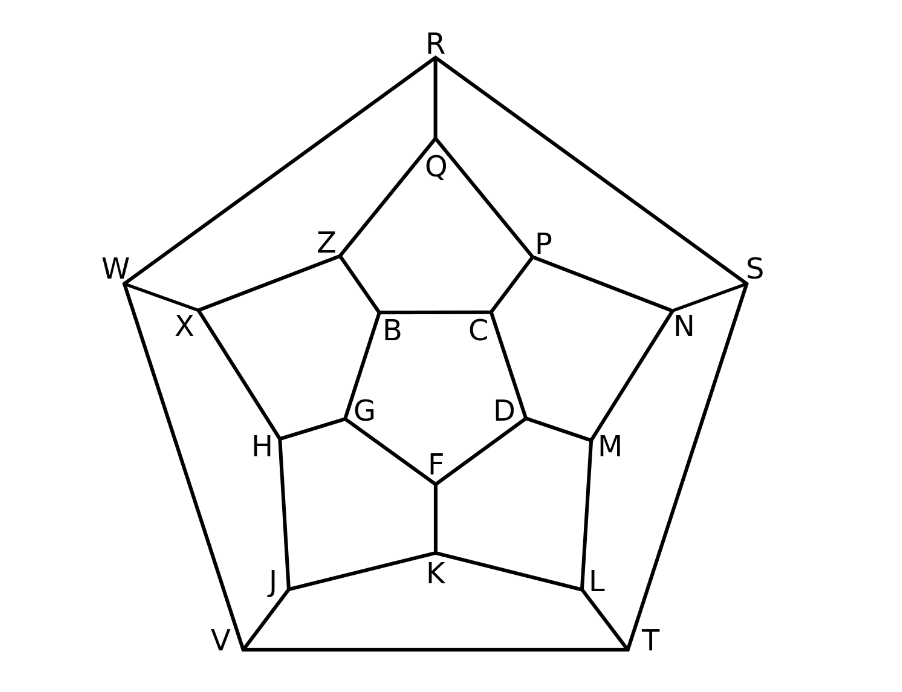

Write a program to find all Hamiltonian circles starting and ending at R

In [17]:
graph = { 'R' : ['Q','S','W'], 'W':['R','X','V'], 'V':['W','J','T'], 'T':['V','L','S'], 'S':['N','T','R'],
         'Q' : ['R','Z','P'], 'Z':['Q','B','X'], 'X':['Z','W','H'], 'H':['X','G','J'],'J':['H','K','V'],
         'K' :['F','J','L'], 'L':['T','M','K'], 'M':['L','N','D'], 'N':['M','S','P'], 'P':['N','C','Q'],
         'C':['P','B','D'], 'B':['C','G','Z'], 'G':['B','F','H'], 'F':['G','D','K'], 'D':['M', 'F','C']}

In [18]:
def adjacency_matrix(graph:dict):
    """Return adjacency matrix from a dicionary-like graph"""
    
    # Init matrix len
    matrix = np.zeros((len(graph), len(graph)),dtype=int)
    
    # Create a dictionary that assigns matrix positions to each letter
    letter_to_matrix = { node : i for i,node in enumerate(graph.keys()) }

    # Dictionary to turn matrix back into letter
    matrix_to_letters = { i : node for i,node in enumerate(graph.keys()) }
    # Fill out with adjacency information
    for node, i in letter_to_matrix.items():
        # Each node corresponds to a row
        for adj in list(graph[node]):
            matrix[i][int(letter_to_matrix[adj])] = 1
            
    return matrix, matrix_to_letters

In [19]:
# Get matrix from graph
matrix, matrix_to_letters = adjacency_matrix(graph)

In [20]:
def check_positon(v, graph, path, pos):
    """Checks if the node can be added at a certain position in the solution cycle"""
    # If node forms an edge with last node in solution cyle
    if graph[path[pos - 1]][v] == 0:
        return False

    # If the vertex is already in the path
    for i in range(pos):
        if path[i] == v:
            return False

    return True

In [21]:
def find_all_cycles(graph, pos, path, visited):
    """Finds all possible Hamiltonian cycles"""
    global solution
    # If we've already found all the nodes
    if pos == len(graph):
        # Check if last node and first node have an edge (complete a cycle)
        if graph[path[-1]][path[0]] != 0:

            # If yes, add first node to the path
            path.append(0)
            # Save
            solution.append(path.copy())
            # for i in range(len(path)):
            #     print(path[i], end = " ")
            # print("\n")
            path.pop() # Remove the first vertex added

        return

    # Parse through every node as first node
    for v in range(len(graph)):

        # Check  node can be added
        if check_positon(v, graph, path, pos) and not visited[v]:
            path.append(v)
            visited[v] = True

            # Recursion
            find_all_cycles(graph, pos + 1, path, visited)

            # Remove current node from path
            visited[v] = False
            path.pop()

In [22]:
def Hamilton_Cycle(graph):
    """Find all possible Hamiltonian cycles, starting from all possitions"""
    # Init variables
    path = []
    path.append(0) # append starting point

    # Make list of visited
    visited = [False]*(len(graph))

    for i in range(len(visited)):
        visited[i] = False

    visited[0] = True

    # Find all cycles
    find_all_cycles(graph, 1, path, visited)
    return

In [23]:
# Starting node
start = 'R'

# Run algorithm
solution = []
hamilton_cycles = []
Hamilton_Cycle(matrix)

for sol in solution:
    path = [ matrix_to_letters[i] for i in sol ]
    # If the path starts where we want
    if path[0] == start:
        hamilton_cycles.append(path)
        print("->".join(path))

R->W->V->T->S->N->M->L->K->J->H->X->Z->B->G->F->D->C->P->Q->R
R->W->V->T->S->N->P->C->B->G->F->D->M->L->K->J->H->X->Z->Q->R
R->W->V->T->L->K->J->H->X->Z->Q->P->C->B->G->F->D->M->N->S->R
R->W->V->T->L->M->D->C->B->G->F->K->J->H->X->Z->Q->P->N->S->R
R->W->V->J->H->X->Z->Q->P->N->M->D->C->B->G->F->K->L->T->S->R
R->W->V->J->H->X->Z->B->G->F->K->L->T->S->N->M->D->C->P->Q->R
R->W->V->J->K->L->T->S->N->M->D->F->G->H->X->Z->B->C->P->Q->R
R->W->V->J->K->F->G->H->X->Z->B->C->D->M->L->T->S->N->P->Q->R
R->W->V->J->K->F->D->M->L->T->S->N->P->C->B->G->H->X->Z->Q->R
R->W->V->J->K->F->D->C->B->G->H->X->Z->Q->P->N->M->L->T->S->R
R->W->X->Z->Q->P->N->M->L->K->F->D->C->B->G->H->J->V->T->S->R
R->W->X->Z->Q->P->C->B->G->H->J->V->T->L->K->F->D->M->N->S->R
R->W->X->Z->B->C->D->M->L->K->F->G->H->J->V->T->S->N->P->Q->R
R->W->X->Z->B->G->H->J->V->T->S->N->M->L->K->F->D->C->P->Q->R
R->W->X->H->J->V->T->S->N->P->C->D->M->L->K->F->G->B->Z->Q->R
R->W->X->H->J->V->T->L->K->F->G->B->Z->Q->P->C->D->M->N->S->R
R->W->X-

### Ex. 4 _(2 pts)_ Exact change please

The Euro currency has 1, 2, 5, 10, 20, and 50 cent coins in addition to 1 and 2 euro coins
(100 cents = 1 euro). Write a program to answer the question how many possibilities exist
to get an exact change of 1 euro! Two possibilities are considered different if they differ in
the number of coins of at least one denomination. The order in which the change is given
does not matter. E.g., 1 ×50ct, 1 ×20ct, 2 ×10ct, 4 ×2ct, 2 ×1ct would be one possibility
and 4 ×20ct, 10 ×2ct another.

In [24]:
def get_change(coins, goal):
    # Create a matrix using the previously made function
    matrix = [[0]*(len(coins)) for _ in range(goal +1)]

    # Fill first row
    for i in range(len(coins)):
        matrix[0][i] = 1
  
    # Fill rest of the matrix bottom-up
    # starts at 1 instead of 0, we already filled ot the first row
    for i in range(1, goal+1):
        for j in range(len(coins)):

            # Init x and y
            x,y = 0,0
            # Count of solutions including curr
            if i-coins[j] >= 0:
                x = matrix[i - coins[j]][j]
            # Count of solutions excluding curr
            if j >= 1:
                y = matrix[i][j-1]
            # total count
            matrix[i][j] = x + y

    return matrix[goal][len(coins)-1]

In [25]:
# Driver program to test above function
coins = [1, 2, 5, 10, 20, 50]
solution_matrix = get_change(coins,100)
print(f"There are {solution_matrix} combinations to get 1€ out of {coins} ct coins")

There are 4562 combinations to get 1€ out of [1, 2, 5, 10, 20, 50] ct coins
